# Application : dataset of Cats vs. Dogs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
!pip install h5py
#datasets contain training and test sets with cat and dog images

In [3]:
from utilities import *
#contain functions to open the training and test datasets

X_train, y_train, X_test, y_test = load_data()
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True)) #500 cats (0) and 500 dogs (1)


(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [4]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


C:\Users\houmani\AppData\Local\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


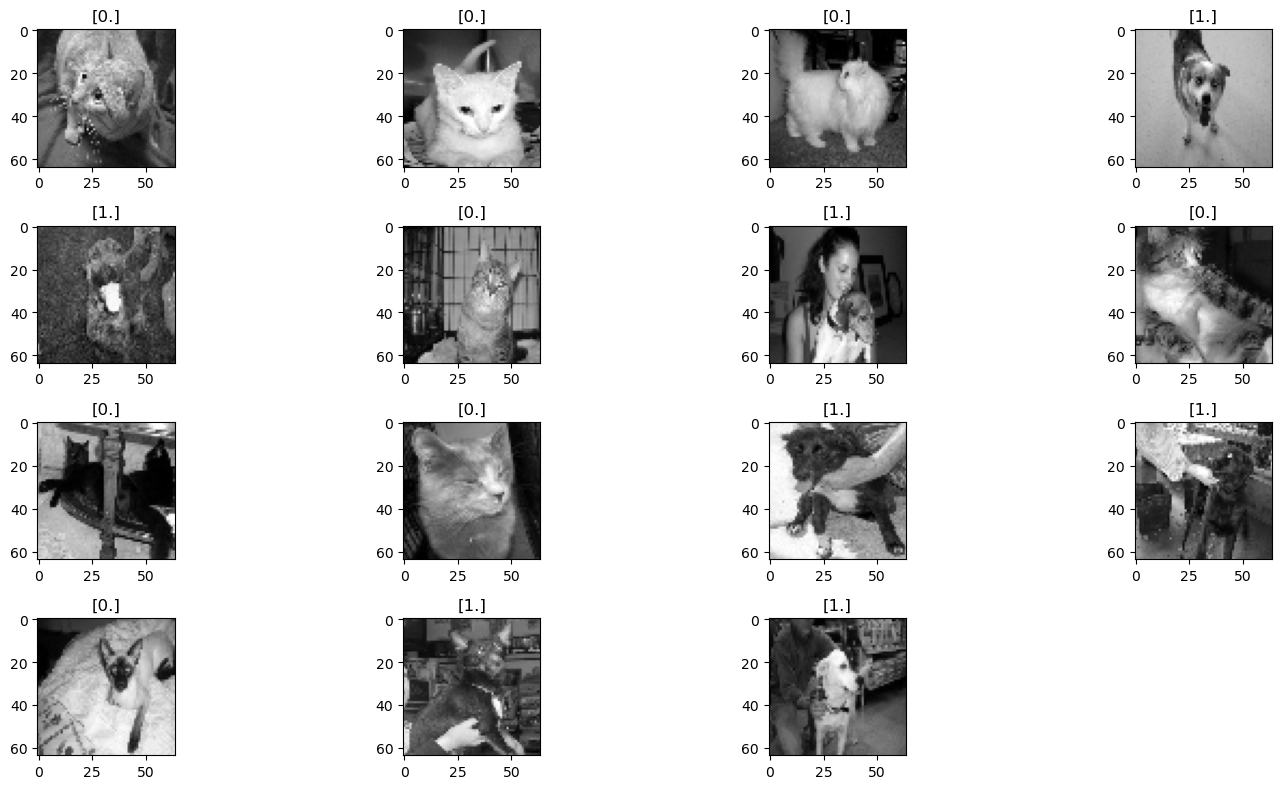

In [5]:
# Observe the first images of the dataset
plt.figure(figsize=(16, 8))
for i in range(1, 16):
    plt.subplot(4, 4, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [6]:
# Reshape the variables in the train_set and test_set (64x64 -> 4096)
# Images are coded in 8 bits (0-255) 0 : black pixel, 255 : white pixel
# We should normalize images : pixel values between 0-1
# Min-max normalization (X_min=0)

#X_train_reshape = X_train.reshape(X_train.shape[0], -X_train.shape[1]*X_train.shape[2]) / X_train.max()
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [7]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

In [8]:
m_train=300
m_test=80
X_test_reshape=X_test_reshape[ :m_test,:]
X_train_reshape=X_train_reshape[:m_train,:]
y_train=y_train[:m_train,:]
y_test=y_test[:m_test,:]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(300, 4096)
(80, 4096)
(300, 1)
(80, 1)


## Fundamental Functions

In [9]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [10]:
def model(X, W, b):
    Z = X.dot(W) + b
    # print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [11]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [12]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [13]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [14]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [15]:
#Progression bar
from tqdm import tqdm

In [16]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 200):

    W, b = initialisation(X_train)
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %1 == 0: #if iteration multiple of 10, do
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # Update
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train loss')
    plt.plot(test_loss, label='Test loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train acc')
    plt.plot(test_acc, label='Test acc')
    plt.legend()
    plt.show()

    return (W, b)

## Application of the model

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:30<00:00, 323.07it/s]


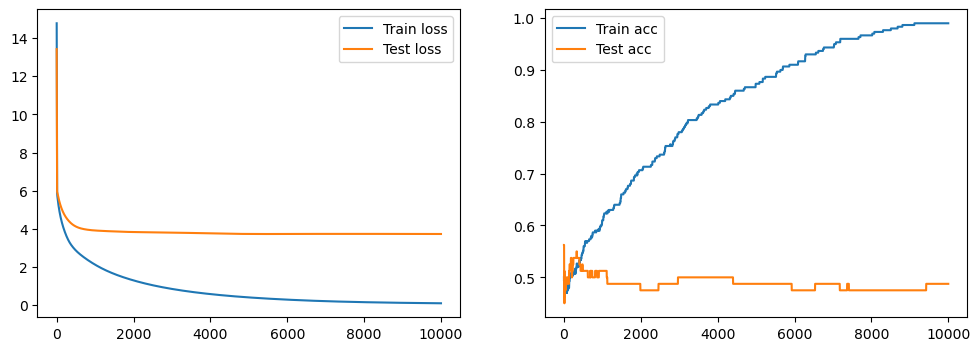

In [17]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01, n_iter=10000)